In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import sys

In [ ]:
# First we see the topology of the graph and create an adjacency matrix
adj_mat = [
    [0, 1, 1, 0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 0],
    [1, 1, 0, 1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 1, 0],
    [1, 0, 1, 0, 0, 1, 0, 1],
    [0, 1, 0, 1, 1, 0, 1, 1],
    [1, 0, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
]

In [ ]:
# Alternatively, we create a NetworkX graph by adding edges
graph_original = nx.Graph()
edge_list = [(1,2),(1,3),(1,5),(1,7),(2,3),(2,6),(3,4),(3,5),(4,6),(4,7),(5,6),(5,8),(6,7),(6,8),(7,8)]
graph_original.add_edges_from(edge_list)

We want to visualize the graph we have built

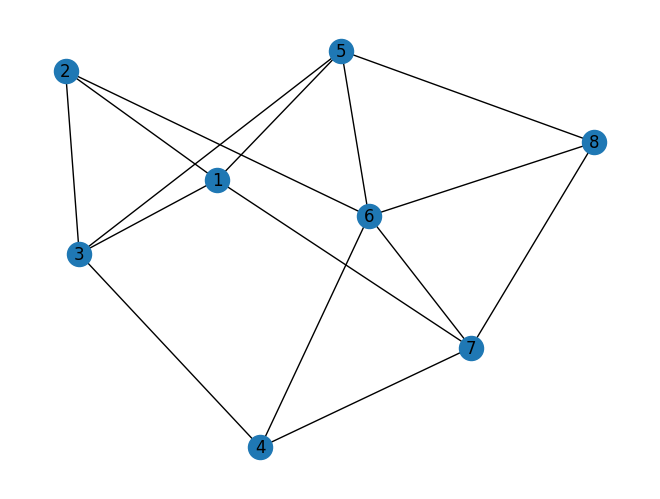

In [ ]:
nx.draw(graph_original, with_labels=True)
plt.show()

We create an empty list to store all the exhaustive combinations of nodes that form graphs that give connected networks

> Indented block



In [ ]:
connected_network = []

In [ ]:
nx.number_connected_components(graph_original)

1

In [ ]:
trial = nx.Graph()
trial.add_nodes_from([1,2])
nx.number_connected_components(trial)

2

First we get a list of all nodes in the original graph


In [ ]:
nodes_of_graph = list(graph_original.nodes())
num_nodes = len(nodes_of_graph)
possible = 2**num_nodes
nodes_of_graph

[1, 2, 3, 5, 7, 6, 4, 8]

We run an exhaustive enumeration to store all combinations of nodes that can fail

In [ ]:
exhaustive_enumeration = []

In [ ]:
from itertools import combinations

Using itertools combinations, we have 2^n lists, where n=num_of_nodes

In [ ]:
for i in range(len(nodes_of_graph)+1):
    exhaustive_enumeration.extend(combinations(nodes_of_graph, i))
    
print(len(exhaustive_enumeration))
assert len(exhaustive_enumeration) == 256, "Number of nodes of the graph are not equal to 8"

256


For each combination in the exhaustive list, we check if the remaining network is still connected.

The logic is that the network is connected as long as there is only one connected component which is the entire graph/network itself.

In [ ]:
for failed_nodes in exhaustive_enumeration:
    remaining_network = graph_original.copy()
    remaining_network.remove_nodes_from(failed_nodes)
    if nx.number_connected_components(remaining_network)==1:
        connected_network.append(list(remaining_network.nodes()))

len(connected_network)

201

In [ ]:
print(connected_network)

[[1, 2, 3, 5, 7, 6, 4, 8], [2, 3, 5, 7, 6, 4, 8], [1, 3, 5, 7, 6, 4, 8], [1, 2, 5, 7, 6, 4, 8], [1, 2, 3, 7, 6, 4, 8], [1, 2, 3, 5, 6, 4, 8], [1, 2, 3, 5, 7, 4, 8], [1, 2, 3, 5, 7, 6, 8], [1, 2, 3, 5, 7, 6, 4], [3, 5, 7, 6, 4, 8], [2, 5, 7, 6, 4, 8], [2, 3, 7, 6, 4, 8], [2, 3, 5, 6, 4, 8], [2, 3, 5, 7, 4, 8], [2, 3, 5, 7, 6, 8], [2, 3, 5, 7, 6, 4], [1, 5, 7, 6, 4, 8], [1, 3, 7, 6, 4, 8], [1, 3, 5, 6, 4, 8], [1, 3, 5, 7, 4, 8], [1, 3, 5, 7, 6, 8], [1, 3, 5, 7, 6, 4], [1, 2, 7, 6, 4, 8], [1, 2, 5, 6, 4, 8], [1, 2, 5, 7, 4, 8], [1, 2, 5, 7, 6, 8], [1, 2, 5, 7, 6, 4], [1, 2, 3, 6, 4, 8], [1, 2, 3, 7, 4, 8], [1, 2, 3, 7, 6, 8], [1, 2, 3, 7, 6, 4], [1, 2, 3, 5, 4, 8], [1, 2, 3, 5, 6, 8], [1, 2, 3, 5, 6, 4], [1, 2, 3, 5, 7, 8], [1, 2, 3, 5, 7, 4], [1, 2, 3, 5, 7, 6], [5, 7, 6, 4, 8], [3, 7, 6, 4, 8], [3, 5, 6, 4, 8], [3, 5, 7, 4, 8], [3, 5, 7, 6, 8], [3, 5, 7, 6, 4], [2, 7, 6, 4, 8], [2, 5, 6, 4, 8], [2, 5, 7, 6, 8], [2, 5, 7, 6, 4], [2, 3, 6, 4, 8], [2, 3, 7, 4, 8], [2, 3, 7, 6, 8], [2, 3, 7

Now we create a reliability map to calculate and store reliability values for the varying reliability parameter.

In [ ]:
reliability_map = {}

For a network that is connected, the node_list is used to find the nodes that are up, and we multiply the product of probabilities of those nodes being up with the product of probabilities of the other nodes not being up, or failing.

The reliability value for the network being connected is calculated by summing over this product for all possible combinations of nodes that result in a connected network.

In [ ]:
for prob in np.arange(0.05, 1.05, 0.05):
    p = round(prob, 2)
    r = 0
    for node_list in connected_network:
        n = len(node_list)
        r += p**n * (1-p)**(8-n)
    reliability_map[p] = r

print(reliability_map)

{0.05: 0.31038729832031237, 0.1: 0.4858581700000002, 0.15: 0.5786467264453122, 0.2: 0.6252979200000006, 0.25: 0.6502227783203125, 0.3: 0.6686585699999995, 0.35: 0.6891039889453131, 0.4: 0.7152947199999989, 0.45: 0.7477800233203126, 0.5: 0.78515625, 0.55: 0.8250084764453083, 0.6: 0.8646067199999954, 0.65: 0.9013984733203112, 0.7: 0.9333345700000025, 0.75: 0.9590606689453125, 0.8: 0.9780019199999996, 0.85: 0.9903636483203102, 0.9: 0.997066170000002, 0.95: 0.9996271264453147, 1.0: 1.0}


The resultant values seem to increase as the reliability parameter increases. 

We can plot this on a graph to visualize graphically how the obtaied network reliability value depends on p.

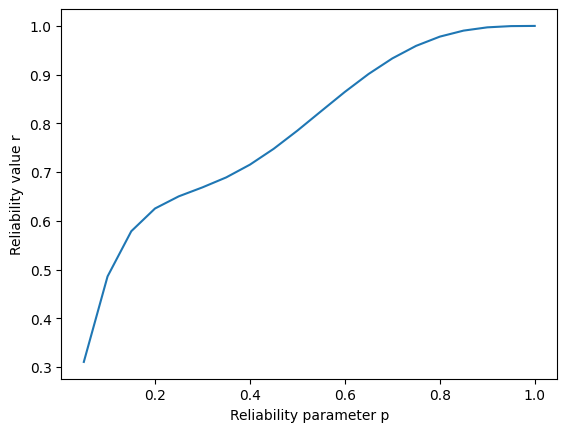

In [ ]:
plt.plot(list(reliability_map.keys()), list(reliability_map.values()))
plt.xlabel('Reliability parameter p')
plt.ylabel('Reliability value r')
plt.show()